# Lecture 15: Curvature of Surfaces (Discrete Differential Geometry) by Keenan Crane

In [11]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

## Normal Curvature

https://www.youtube.com/watch?v=e-erMrqBd1w&t=3689s

37:42 - 38:00

In [12]:
u, v, x, y = sympy.symbols('u v x y')

f = sympy.Matrix([sympy.cos(u), sympy.sin(u), v])
df = f.jacobian([u,v])

# take cross product of df with itself
N = f.diff(u).cross(f.diff(v))
dN = N.diff(u) + N.diff(v)

# .replace(sympy.Abs, lambda e: e)) simply removes the abs() function
k_Nu = (f.diff(u).dot(N.diff(u)))/((f.diff(u).norm().replace(sympy.Abs, lambda e: e))**2)
k_Nu.simplify()
k_Nv = (f.diff(v).dot(N.diff(v)))/((f.diff(v).norm().replace(sympy.Abs, lambda e: e))**2)
k_Nv.simplify()
display(k_Nu, k_Nv)

1

0

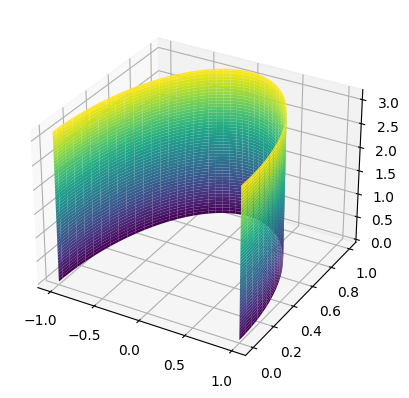

In [13]:
## Plot our parametric surface
Ur = np.linspace(0, 3.14, 100)
Vr = np.linspace(0, 3.14, 100)
U, V = np.meshgrid(Ur, Vr)
X = np.cos(U)
Y = np.sin(U)
Z = V
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
asm = ax.plot_surface(X, Y, Z, cmap='viridis')

## Shape Operator

https://www.youtube.com/watch?v=e-erMrqBd1w&t=3689s

43:00

In [14]:
gradient = lambda f, v: sympy.Matrix([f]).jacobian(v)

In [15]:
u, v, x, y = sympy.symbols('u v x y')

# Evaluate at Point p
p = [1,1]
print('p'); display(p)

# input function
f = sympy.Matrix([sympy.cos(u), sympy.sin(u), u+v])
# f = Matrix([u, v, 2*u**3+v**2])
# f =  Matrix([u, v, 0.0074309364675612406 * u**0 * v**0 + 5.47357899196928e-06 * u**1 * v**0 + -1.3343667748093953e-05 * u**2 * v**0 + -2.2145099553893485e-09 * u**3 * v**0 + 1.138031730306762e-08 * u**4 * v**0 + -3.8934937682835766e-05 * u**0 * v**1 + -5.0974652508101104e-08 * u**1 * v**1 + 1.2467614091890012e-06 * u**2 * v**1 + 2.6466497067191282e-09 * u**3 * v**1 + -5.533383835000518e-05 * u**0 * v**2 + -2.289366491156733e-09 * u**1 * v**2 + 2.0711187146273883e-07 * u**2 * v**2 + 1.8308947323919917e-07 * u**0 * v**3 + 2.871618723015514e-09 * u**1 * v**3 + 4.5370182034072814e-08 * u**0 * v**4])
# f = Matrix([u, v, u*v])
print('f'); display(f)

# derivative of f
df = gradient(f, (u,v))
# df = f.jacobian([u,v])
print('df'); display(df)
# Find normal by taking cross product of df/du and df/dv
N = f.diff(u).cross(f.diff(v)) #/(f.diff(u).cross(f.diff(v))).norm()
print('N'); display(N)
# derivative of N
dN = gradient(N, (u,v))
print('dN'); display(dN)
## Shape operator: df * S = dN
S = df.solve(dN)
print(f'S({p})'); display(S)

X = S.eigenvects() #returns eigenvalues, eigenvects
display(X)

k1 = X[0][0] # k[0]
k2 = X[1][0] # k[1]
X1 = X[0][2][0]
X2 = X[1][2][0]
# calculate the curvature vector of the surface
k1vec = (df * X1)#.subs({u: p[0], v: p[1]})
k2vec = (df * X2)#.subs({u: p[0], v: p[1]})

print(f'k1: {k1}, k2: {k2}')
print('Curvature vectors:')
display(k1vec)
display(k2vec)
print(f'Are orthogonal: {abs(k1vec.dot(k2vec)) < 0.00000001} ({k1vec.dot(k2vec)})')

p


[1, 1]

f


Matrix([
[cos(u)],
[sin(u)],
[ u + v]])

df


Matrix([
[-sin(u), 0],
[ cos(u), 0],
[      1, 1]])

N


Matrix([
[cos(u)],
[sin(u)],
[     0]])

dN


Matrix([
[-sin(u), 0],
[ cos(u), 0],
[      0, 0]])

S([1, 1])


Matrix([
[ 1, 0],
[-1, 0]])

[(0,
  1,
  [Matrix([
   [0],
   [1]])]),
 (1,
  1,
  [Matrix([
   [-1],
   [ 1]])])]

k1: 0, k2: 1
Curvature vectors:


Matrix([
[0],
[0],
[1]])

Matrix([
[ sin(u)],
[-cos(u)],
[      0]])

Are orthogonal: True (0)


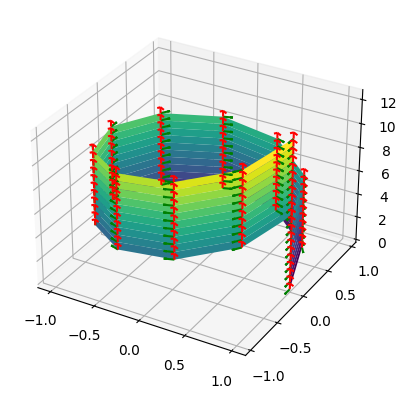

In [16]:
## Plot our parametric surface

res = 11
Ur = np.linspace(0, 2*3.14, res)
Vr = np.linspace(0, 2*3.14, res)
U, V = np.meshgrid(Ur, Vr)
X = np.cos(U)
Y = np.sin(U)
Z = U+V

U1 = np.empty(shape=(res, res))
V1 = np.empty(shape=(res, res))
W1 = np.empty(shape=(res, res))
U2 = np.empty(shape=(res, res))
V2 = np.empty(shape=(res, res))
W2 = np.empty(shape=(res, res))

scale = 1
zscale = 1
for i in range(res):
    for j in range(res):
        U1[j, i] = k1vec[0].subs({u: Ur[i], v: Vr[j]})
        V1[j, i] = k1vec[1].subs({u: Ur[i], v: Vr[j]})
        W1[j, i] = k1vec[2].subs({u: Ur[i], v: Vr[j]})
        U2[j, i] = k2vec[0].subs({u: Ur[i], v: Vr[j]})
        V2[j, i] = k2vec[1].subs({u: Ur[i], v: Vr[j]})
        W2[j, i] = k2vec[2].subs({u: Ur[i], v: Vr[j]})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
asm = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.quiver(X, Y, Z, U1, V1, W1,color='r', length=0.5) # , length=0.1, normalize=True)
ax.quiver(X, Y, Z, U2, V2, W2,color='g', length=0.1)